In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import fractions
import numpy as np

from scipy import stats
from scipy import optimize as op
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.base.model import GenericLikelihoodModel
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import powerlaw

Text(0.5, 0, '$income$')

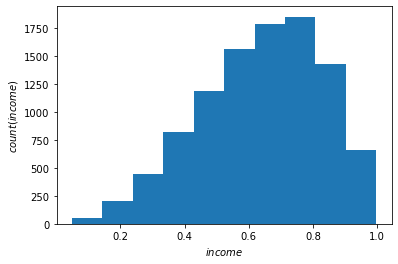

In [4]:
income=np.random.beta(3.5,2, size=10000) #where 3.5 and 2 are shapefactors of a beta distribution fitted to the income distribution of a lsoa
plt.figure()
plt.hist(income)
plt.ylabel(r'$count(income)$')
plt.xlabel(r'$income$')


Text(0.5, 0, '$education$')

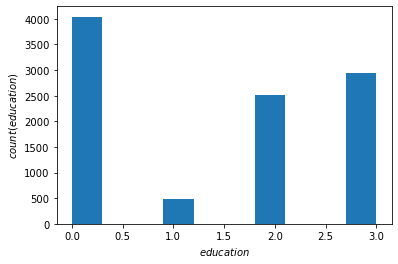

In [5]:
###############
education=np.random.choice(4, 10000, p=[0.4, 0.05, 0.25, 0.3]) #where p values are effectively the ratio of people with a given education level you can alternatively use the same method for income as well
plt.figure()
plt.hist(education)
plt.ylabel(r'$count(education)$')
plt.xlabel(r'$education$')

Calculating best minimal value for power law fit


Text(0.5, 0, '$attractivity$')

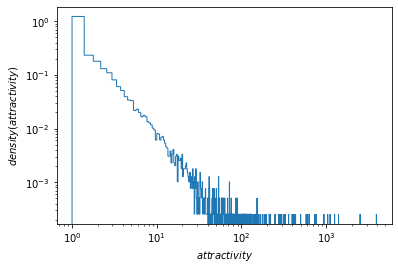

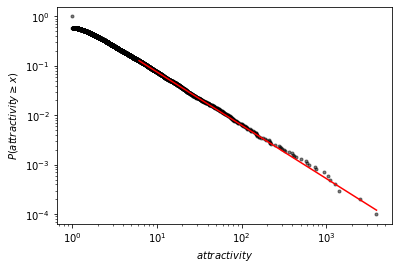

In [6]:
###############
attractivity=income**(-education)
plt.figure()
plt.hist(attractivity, bins=10000, density=True, histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$density(attractivity)$')
plt.xlabel(r'$attractivity$')

attractivtiy_powerlaw = powerlaw.Fit(attractivity)
attractivtiy_powerlaw_temp = powerlaw.Fit(attractivity, xmin=1)
plt.figure()
powerlaw_plot=attractivtiy_powerlaw_temp.plot_ccdf(original_data=True, color='k', marker='.', lw=0, alpha=0.5)
X=attractivtiy_powerlaw_temp.ccdf()
x=X[0][X[0]>=attractivtiy_powerlaw.xmin]
y=[np.exp( (-(attractivtiy_powerlaw.alpha-1)*(np.log(i)-np.log(attractivtiy_powerlaw.xmin))+np.log(X[1][X[0]==attractivtiy_powerlaw.xmin])) ) for i in x]
plt.plot(x, y, 'r')
plt.ylabel(r'$P(attractivity \geq x)$')
plt.xlabel(r'$attractivity$')